In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import torch

# add path of Tangram repository for importing it
sys.path.append("./Tangram") 
import tangram as tg

## Mapping

AnnData object with n_obs × n_vars = 27261 × 17919
    obs: 'x', 'y'


/home/myp2113/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


View of AnnData object with n_obs × n_vars = 13829 × 17919
    obs: 'x', 'y'

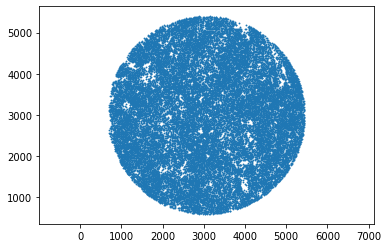

In [2]:
path = os.path.join('data', 'corrected_ad_sp.h5ad')
ad_sp = sc.read_h5ad(path)

print(ad_sp)

plt.axis('equal')
plt.scatter(ad_sp.obs.x.values, 
            ad_sp.obs.y.values, 
            s=.7)

ad_sp = ad_sp[ad_sp.obs.x <= (ad_sp.obs.x.max() - ad_sp.obs.x.min()) / 2 + ad_sp.obs.x.min()]
ad_sp

sc data might also be ought to only have test data because otherwise there are ones in sc data that is already mapped.

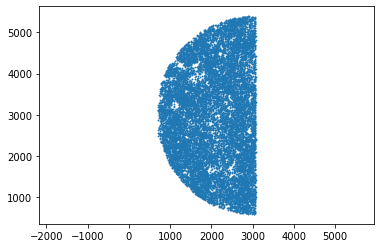

In [3]:
plt.axis('equal')
plt.scatter(ad_sp.obs.x.values, 
            ad_sp.obs.y.values, 
            s=.7)

In [4]:
# single-cell data need the following steps:
# 1. remove mitochondrial genes, which are removed in this data set
# 2. normalization
# 3. log(1+p) transformation: not necessary for mapping; necessary for selecting marker genes

path = os.path.join('data', 'corrected_ad_sc.h5ad')
ad_sc = sc.read_h5ad(path)
sc.pp.normalize_total(ad_sc)
ad_sc

AnnData object with n_obs × n_vars = 26139 × 2505
    obs: 'cluster', 'subcluster'

In [5]:
# load marker genes processed from another file
df_genes = pd.read_csv('data/puck_markers20.csv', index_col=0)
markers = df_genes.values.flatten()
print(len(markers))
markers

220


array(['Neurod1', 'Bsg', 'Cst3', 'Car8', 'Pvalb', 'Atp1b1', 'Tmsb4x',
       'Plp1', 'Slc1a3', 'Apoe', '1500015O10Rik', 'Snap25', 'Pltp',
       'Sparc', 'Itpr1', 'Atp1b1', 'Gnas', 'C1qb', 'Enpp2', 'Sparcl1',
       'Atp1a2', 'Apoe', 'Chn2', 'Tmsb4x', 'Cald1', 'Pcp4', 'Slc24a2',
       'App', 'C1qc', 'Cnp', 'Atp1a2', 'Mt1', 'Clu', 'Rbfox3', 'Ly6c1',
       'Atp1a2', 'Pvalb', 'Cacng2', 'Ttc3', 'Cst3', 'Mag', 'Aldoc',
       'Aqp4', 'Pcp4l1', 'Stmn2', 'Itm2a', 'Igfbp7', 'Calb1', 'Slc6a1',
       'Syt1', 'C1qa', 'Trf', 'Apoe', 'Sparcl1', 'Dbi', 'Cplx2', 'Flt1',
       'Vtn', 'Nsg1', 'Camk2n1', 'Ndrg4', 'B2m', 'Mbp', 'Mt1', 'Cd81',
       'Chchd10', 'Nrep', 'Sparc', 'Actb', 'Pcp2', 'Gabra1', 'Atp1a3',
       'Actb', 'Cldn11', 'Dbi', 'Mt2', 'Mt3', 'Chgb', 'Ly6a', 'Sparcl1',
       'Dner', 'Kcna2', 'Nefl', 'Csf1r', 'Aplp1', 'Gpr37l1', 'Aldoc',
       'Cst3', 'Gabra6', 'Cldn5', 'Ptn', 'Rgs8', 'Kit', 'Scg2', 'Rplp1',
       'Cryab', 'Pla2g7', 'Cst3', 'Fth1', 'Cbln3', 'Ly6e', 'Myl9', 'Rora',
  

In [6]:
# Tangram makes sure the gene orders are the same for both datasets
# genes=None uses all genes
# genes=markers uses marker genes defined in a list `markers`
ad_sc, ad_sp = tg.pp_adatas(ad_sc, ad_sp, genes=markers)

In [7]:
ad_sc

View of AnnData object with n_obs × n_vars = 26139 × 178
    obs: 'cluster', 'subcluster'

In [8]:
ad_sp

View of AnnData object with n_obs × n_vars = 13829 × 178
    obs: 'x', 'y'

In [9]:
assert ad_sc.var.index.equals(ad_sp.var.index)

In [10]:
ad_map = tg.map_cells_to_space(
    adata_cells=ad_sc,
    adata_space=ad_sp,
#     device='cpu',
    device='cuda:0'
)

Score: 0.177, KL reg: nan, VG reg: nan
Score: 0.745, KL reg: nan, VG reg: nan
Score: 0.770, KL reg: nan, VG reg: nan
Score: 0.775, KL reg: nan, VG reg: nan
Score: 0.778, KL reg: nan, VG reg: nan
Score: 0.779, KL reg: nan, VG reg: nan
Score: 0.780, KL reg: nan, VG reg: nan
Score: 0.781, KL reg: nan, VG reg: nan
Score: 0.782, KL reg: nan, VG reg: nan
Score: 0.782, KL reg: nan, VG reg: nan


Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.


In [11]:
ad_map.write_h5ad('cerebellum_corrected_ad_map_portion5_top20.h5ad')

## Analysis

In [21]:
# ad_map = sc.read_h5ad('cerebellum_corrected_ad_map_fraction4_nolog.h5ad')

path = os.path.join('data', 'corrected_ad_sc.h5ad')
ad_sc = sc.read_h5ad(path)
sc.pp.normalize_total(ad_sc)
ad_sc

AnnData object with n_obs × n_vars = 26139 × 2505
    obs: 'cluster', 'subcluster'

In [22]:
path = os.path.join('data', 'corrected_ad_sp.h5ad')
ad_sp = sc.read_h5ad(path)
ad_sp = ad_sp[ad_sp.obs.x <= (ad_sp.obs.x.max() - ad_sp.obs.x.min()) / 2 + ad_sp.obs.x.min()]
ad_sp

/home/myp2113/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


View of AnnData object with n_obs × n_vars = 13829 × 17919
    obs: 'x', 'y'

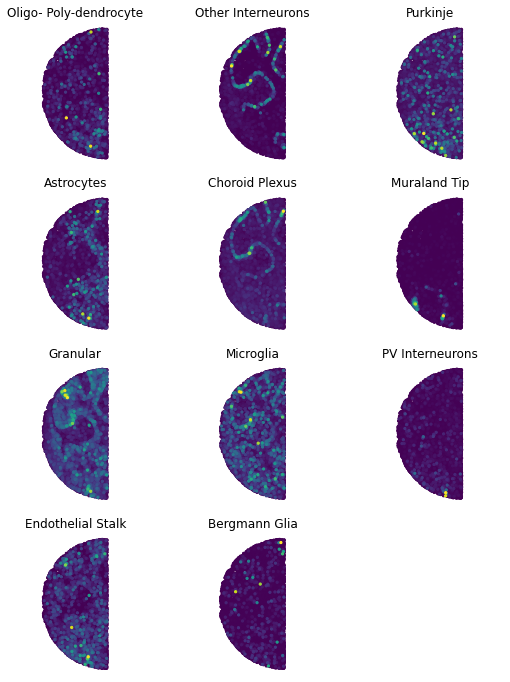

In [13]:
# check how to make the figure larger
tg.plot_cell_annotation(ad_map, annotation='cluster', nrows=4, ncols=3)

In [21]:
# ad_sc.X.sum(axis=1)

In [23]:
ad_ge = tg.project_genes(adata_map=ad_map, adata_sc=ad_sc)
ad_ge

AnnData object with n_obs × n_vars = 13829 × 2505
    obs: 'x', 'y'
    var: 'is_training'

In [24]:
ad_map.uns['train_genes_df']

,train_score,sparsity_sc,sparsity_sp,sparsity_diff
Ttr,0.989827,0.962355,0.893846,-0.068509
Rsph1,0.983040,0.998125,0.997324,-0.000801
Mia,0.978734,0.996710,0.994432,-0.002278
Sln,0.976822,0.995371,0.998481,0.003111
1500015O10Rik,0.965620,0.990895,0.992841,0.001946
...,...,...,...,...
Cplx2,0.565726,0.349248,0.946489,0.597241
Rbfox3,0.562598,0.402961,0.961675,0.558714
Hsp90ab1,0.561803,0.086690,0.889146,0.802456
Ppp3ca,0.538580,0.242702,0.933618,0.690915


/home/myp2113/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


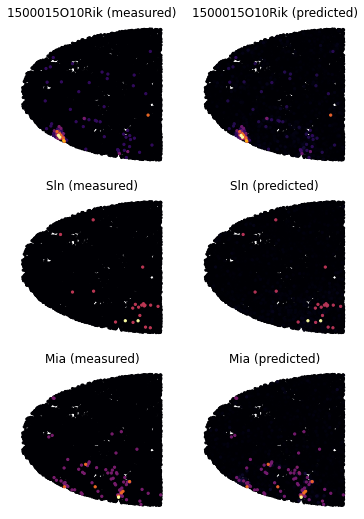

In [25]:
genes = ['1500015O10Rik', 'Sln', 'Mia']
tg.plot_genes(genes, adata_measured=ad_sp, adata_predicted=ad_ge)

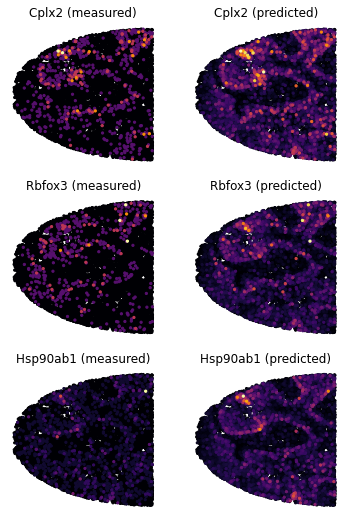

In [26]:
genes = ['Cplx2', 'Rbfox3', 'Hsp90ab1']
tg.plot_genes(genes, adata_measured=ad_sp, adata_predicted=ad_ge)

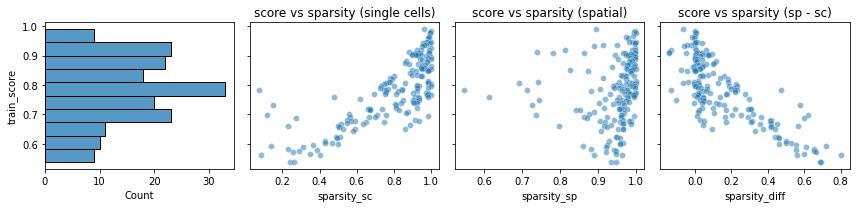

In [27]:
tg.plot_training_scores(ad_map, bins=50, alpha=.5)